# Region

> This module provides functionality for creating region masks from GeoDataFrames and xarray Datasets. It helps identify points that fall within specified geographic regions.

In [ ]:
#| default_exp dataprep.region

In [ ]:
#| hide
from nbdev.showdoc import *

/home/i/Documentos/1_Proyectos/ombs_senegal/.venv/lib/python3.12/site-packages/nbdev/doclinks.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources,importlib


In [ ]:
#| export
import xarray as xr
import geopandas as gpd
import regionmask

In [ ]:
#| hide
from pathlib import Path
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


DATA_PATH = Path('../testing_data')

In [ ]:
#| hide
def generate_sintetic_data(lat=[10, 19], lon=[-17, -6]):
    """Generate synthetic data for a region."""
    resolution = 0.1
    lat = np.arange(lat[0], lat[1] + resolution, resolution)
    lon = np.arange(lon[0], lon[1] + resolution, resolution)
    ds = xr.Dataset(
        data_vars=dict(
            Precipitation=(["time", "lat", "lon"], np.random.rand(1, len(lat), len(lon))),
        ),
        coords=dict(
            time=[dt.datetime(2020, 1, 1)],
            lat=lat,
            lon=lon
        )
    )
    return ds

In [ ]:
#| hide
roi_gdf = gpd.read_file(DATA_PATH/'sample_polygons/sub_poly.shp')
sample_data = generate_sintetic_data()

In [ ]:
#| export
def get_region_mask(ds: xr.Dataset, gdf: gpd.GeoDataFrame) -> xr.DataArray:
    """Create a boolean xarray mask from all geometries in the GeoDataFrame.
    Returns True for points within any geometry, False otherwise."""
    masked_region_with_nan = regionmask.mask_geopandas(gdf, ds)
    mask = ~xr.ufuncs.isnan(masked_region_with_nan)
    return mask

## Example

#### Input

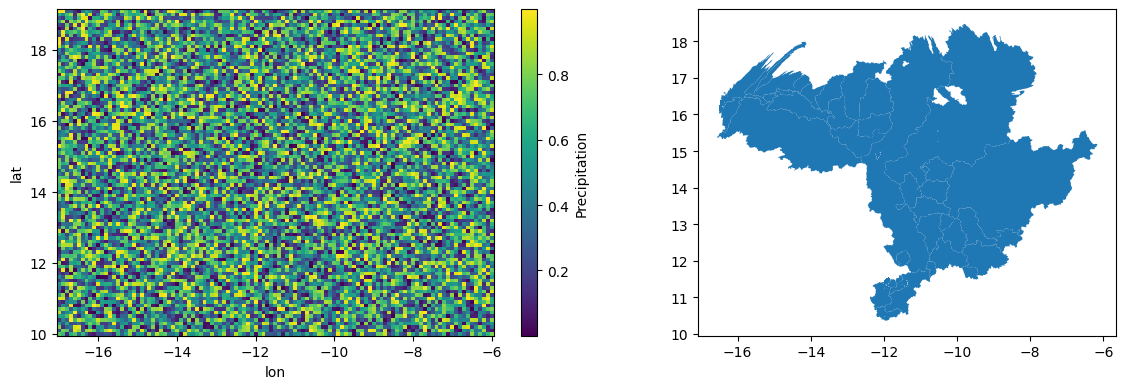

In [ ]:
#| output: true
#| echo: false
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
roi_gdf.geometry.plot(ax=ax2)
sample_data.isel(time=0, drop=True).Precipitation.plot(ax=ax1)
plt.tight_layout()

#### Output

<matplotlib.collections.QuadMesh>

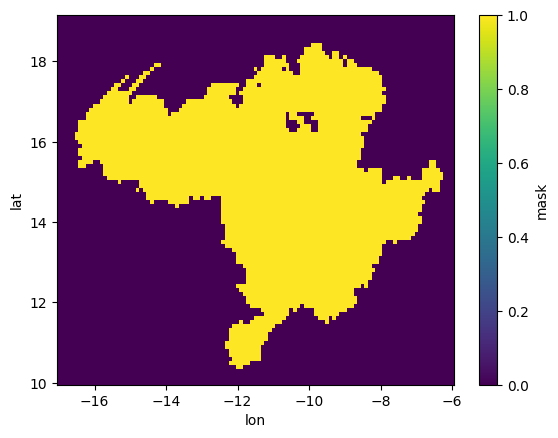

In [ ]:
#| output: true
#| echo: false
region_mask = get_region_mask(sample_data, roi_gdf)
region_mask.plot()

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()